# Sesión 1

**Funamentos de Programación, Control de Flujo y Buenas Practicas**

## Apartado 1: Fundamentos de R

### 1.1 Selección de directorio

In [1]:
# Obvservar el directorio de trabajo actual
getwd()

[1] "C:/Users/rsier/Desktop/MASTERS/LaSalle - MUDS- Professor/Curs_25_26/MD00Extra - Programacio/S1"

In [2]:
# Establecer el directorio de trabajo
file.exists("C:/Users/rsier/Desktop/MASTERS/LaSalle - MUDS- Professor/Curs_25_26") # Comprobar que la ruta existe
setwd("C:/Users/rsier/Desktop/MASTERS/LaSalle - MUDS- Professor/Curs_25_26/MD00Extra - Programacio/S1") # Seleccionar directorio

# Confirmar el directorio de trabajo actual
getwd()

[1] TRUE

[1] "C:/Users/rsier/Desktop/MASTERS/LaSalle - MUDS- Professor/Curs_25_26/MD00Extra - Programacio/S1"

### 1.2 Importación de distintos tipos de datasets

In [3]:
# Cargar paquete para archivos Excel
if (!require("readxl")) install.packages("readxl")
library(readxl)

# Importar archivo CSV
Customers_csv <- read.csv("Data/Customers.csv")
head(Customers_csv)

Cargando paquete requerido: readxl

Warning message:
"package 'readxl' was built under R version 4.4.3"


,CustomerID,Gender,Age,Annual.Income....,Spending.Score..1.100.,Profession,Work.Experience,Family.Size
,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>
1,1,Male,19,15000,39,Healthcare,1,4
2,2,Male,21,35000,81,Engineer,3,3
3,3,Female,20,86000,6,Engineer,1,1
4,4,Female,23,59000,77,Lawyer,0,2
5,5,Female,31,38000,40,Entertainment,2,6
6,6,Female,22,58000,76,Artist,0,2


In [4]:
# Importar archivo Excel
Customers_xlsx <- read_excel("Data/Customers.xlsx")

if (!require("tidyr")) install.packages("tidyr")
library(tidyr)

# Convertir a texto la primera columna y separar por comas
Customers_xlsx <- separate(Customers_xlsx, col = 1,
                           into = c('CustomerID','Gender',
                                    'Age','Annual.Income....',
                                    'Spending.Score..1.100.','Profession',
                                    'Work.Experience','Family.Size'), 
                           sep = ",")

head(Customers_xlsx)

Cargando paquete requerido: tidyr

Warning message:
"package 'tidyr' was built under R version 4.5.0"


CustomerID,Gender,Age,Annual.Income....,Spending.Score..1.100.,Profession,Work.Experience,Family.Size
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
6,Female,22,58000,76,Artist,0,2


### 1.3 Control de calidad rápido de los datos

**Customers_csv**

In [5]:
# Ver las primeras filas de los datos
head(Customers_csv)

,CustomerID,Gender,Age,Annual.Income....,Spending.Score..1.100.,Profession,Work.Experience,Family.Size
,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>
1,1,Male,19,15000,39,Healthcare,1,4
2,2,Male,21,35000,81,Engineer,3,3
3,3,Female,20,86000,6,Engineer,1,1
4,4,Female,23,59000,77,Lawyer,0,2
5,5,Female,31,38000,40,Entertainment,2,6
6,6,Female,22,58000,76,Artist,0,2


In [6]:
# Estructura de los datos
str(Customers_csv)

'data.frame':	2000 obs. of  8 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : chr  "Male" "Male" "Female" "Female" ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income....     : int  15000 35000 86000 59000 38000 58000 31000 84000 97000 98000 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...
 $ Profession            : chr  "Healthcare" "Engineer" "Engineer" "Lawyer" ...
 $ Work.Experience       : int  1 3 1 0 2 0 1 1 0 1 ...
 $ Family.Size           : int  4 3 1 2 6 2 3 3 3 4 ...


In [7]:
# Resumen estadístico
summary(Customers_csv)

   CustomerID        Gender               Age        Annual.Income....
 Min.   :   1.0   Length:2000        Min.   : 0.00   Min.   :     0   
 1st Qu.: 500.8   Class :character   1st Qu.:25.00   1st Qu.: 74572   
 Median :1000.5   Mode  :character   Median :48.00   Median :110045   
 Mean   :1000.5                      Mean   :48.96   Mean   :110732   
 3rd Qu.:1500.2                      3rd Qu.:73.00   3rd Qu.:149093   
 Max.   :2000.0                      Max.   :99.00   Max.   :189974   
 Spending.Score..1.100.  Profession        Work.Experience   Family.Size   
 Min.   :  0.00         Length:2000        Min.   : 0.000   Min.   :1.000  
 1st Qu.: 28.00         Class :character   1st Qu.: 1.000   1st Qu.:2.000  
 Median : 50.00         Mode  :character   Median : 3.000   Median :4.000  
 Mean   : 50.96                            Mean   : 4.103   Mean   :3.768  
 3rd Qu.: 75.00                            3rd Qu.: 7.000   3rd Qu.:5.000  
 Max.   :100.00                            Max.

**Customers_xlsx**

In [8]:
# Ver las primeras filas de los datos
head(Customers_xlsx)

CustomerID,Gender,Age,Annual.Income....,Spending.Score..1.100.,Profession,Work.Experience,Family.Size
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
6,Female,22,58000,76,Artist,0,2


In [9]:
# Estructura de los datos
str(Customers_xlsx)

tibble [2,000 × 8] (S3: tbl_df/tbl/data.frame)
 $ CustomerID            : chr [1:2000] "1" "2" "3" "4" ...
 $ Gender                : chr [1:2000] "Male" "Male" "Female" "Female" ...
 $ Age                   : chr [1:2000] "19" "21" "20" "23" ...
 $ Annual.Income....     : chr [1:2000] "15000" "35000" "86000" "59000" ...
 $ Spending.Score..1.100.: chr [1:2000] "39" "81" "6" "77" ...
 $ Profession            : chr [1:2000] "Healthcare" "Engineer" "Engineer" "Lawyer" ...
 $ Work.Experience       : chr [1:2000] "1" "3" "1" "0" ...
 $ Family.Size           : chr [1:2000] "4" "3" "1" "2" ...


In [10]:
# Resumen estadístico
summary(Customers_xlsx)

  CustomerID           Gender              Age            Annual.Income.... 
 Length:2000        Length:2000        Length:2000        Length:2000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 Spending.Score..1.100.  Profession        Work.Experience   
 Length:2000            Length:2000        Length:2000       
 Class :character       Class :character   Class :character  
 Mode  :character       Mode  :character   Mode  :character  
 Family.Size       
 Length:2000       
 Class :character  
 Mode  :character  

### 1.4 Cambiar tipo de dato (de numérico a factor)

In [11]:
# Cambiar la columna 'CustomerID' a factor
Customers_xlsx$Age <- as.numeric(Customers_xlsx$Age)

In [12]:
head(Customers_xlsx)

CustomerID,Gender,Age,Annual.Income....,Spending.Score..1.100.,Profession,Work.Experience,Family.Size
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
6,Female,22,58000,76,Artist,0,2


<br>

## Apartado 2: Control de Flujo

### 2.1 Uso de condicionales if, else, y elif

In [13]:
customer_age <- 67

if (customer_age < 18) {
  print("Cliente menor de edad")
} else if (customer_age >= 18 && customer_age < 65) {
  print("Cliente adulto")
} else {
  print("Cliente en edad avanzada")
}

[1] "Cliente en edad avanzada"


### 2.2 Crear bucles con for y while

In [14]:
# Bucle for para recorrer edades de clientes
for (age in Customers_csv$Age) {
    if (age < 18) {
      print("Cliente menor de edad")
    } else if (age >= 18 && age < 65) {
      print("Cliente adulto")
    } else {
      print("Cliente en edad avanzada")
}
}

[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente en edad avanzada"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente en edad avanzada"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente adulto"
[1] "Cliente a

In [15]:
# Bucle while
i <- 1

while (i <= 5) {
  print(Customers_csv$Age[i])
  i <- i + 1
}

[1] 19
[1] 21
[1] 20
[1] 23
[1] 31


### 2.3 Funciones avanzadas: apply, lapply

- **apply**: se utiliza para aplicar una función a lo largo de filas o columnas de una matriz o data frame

- **lapply**: aplica una función a cada elemento de una lista, devolviendo siempre una lista como resultado.

In [16]:
# Sumar las edades de los clientes
apply_obj <- apply(Customers_csv["Age"], 2, sum); apply_obj

class(apply_obj)

Age 
97920

[1] "integer"

In [17]:
lapply_obj <- lapply(Customers_csv[, c("Age", "Work.Experience")], mean); lapply_obj

class(lapply_obj)

$Age
[1] 48.96

$Work.Experience
[1] 4.1025

[1] "list"

<br>

### Apartado 3: Buenas Prácticas

**Buen Código**

In [18]:
# Función para calcular la media y desviación estándar de la columna "Age"
calcular_estadisticas <- function(datos) {
  # Comprobar si la columna "Age" existe en los datos
  if ("Age" %in% names(datos)) {
    # Calcular media y desviación estándar de "Age", excluyendo valores NA
    media_edad <- mean(datos$Age, na.rm = TRUE)
    desviacion_edad <- sd(datos$Age, na.rm = TRUE)
    
    # Imprimir resultados
    cat("Media de Edad:", media_edad, "\n")
    cat("Desviación Estándar de Edad:", desviacion_edad, "\n")
  } else {
    cat("La columna 'Age' no existe en los datos.\n")
  }
}

# Llamada a la función con un data frame de ejemplo
calcular_estadisticas(Customers_csv)

Media de Edad: 48.96 
Desviación Estándar de Edad: 28.42975 


- **Nombres de variables y funciones descriptivos**: calcular_estadisticas, media_edad, y desviacion_edad son nombres claros y precisos.
- **Comprobación de errores**: La función verifica si la columna "Age" existe antes de realizar cálculos, evitando errores.
- **Documentación mínima en comentarios**: Explica los pasos principales sin saturar el código con comentarios innecesarios.
- **Estructura clara**: La función es modular y encapsula un solo propósito, lo que facilita su comprensión y reutilización.

**Mal Código**

In [19]:
calc <- function(d) {
  if (!is.null(d)) {
      x <- mean(d$Age, na.rm = TRUE)
      y <- sd(d$Age, na.rm = TRUE)
    
    if (x > 30) {
      for (i in 1:length(d$Age)) {
        print(d$Age[i])
      }
    } else {
      print(paste("Promedio de edades es menor que 30:", x))
    }
    
    if (y > 5) {
      cat("La desviación estándar es alta\n")
    }
    
  }
}

calc(Customers_csv)

[1] 19
[1] 21
[1] 20
[1] 23
[1] 31
[1] 22
[1] 35
[1] 23
[1] 64
[1] 30
[1] 67
[1] 35
[1] 58
[1] 24
[1] 37
[1] 22
[1] 35
[1] 20
[1] 52
[1] 35
[1] 35
[1] 25
[1] 46
[1] 31
[1] 54
[1] 29
[1] 45
[1] 35
[1] 40
[1] 23
[1] 60
[1] 21
[1] 53
[1] 18
[1] 49
[1] 21
[1] 42
[1] 30
[1] 36
[1] 20
[1] 65
[1] 24
[1] 48
[1] 31
[1] 49
[1] 24
[1] 50
[1] 27
[1] 29
[1] 31
[1] 49
[1] 33
[1] 31
[1] 59
[1] 50
[1] 47
[1] 51
[1] 69
[1] 27
[1] 53
[1] 70
[1] 19
[1] 67
[1] 54
[1] 63
[1] 18
[1] 43
[1] 68
[1] 19
[1] 32
[1] 70
[1] 47
[1] 60
[1] 60
[1] 59
[1] 26
[1] 45
[1] 40
[1] 23
[1] 49
[1] 57
[1] 38
[1] 67
[1] 46
[1] 21
[1] 48
[1] 55
[1] 22
[1] 34
[1] 50
[1] 68
[1] 18
[1] 48
[1] 40
[1] 32
[1] 24
[1] 47
[1] 27
[1] 48
[1] 20
[1] 23
[1] 49
[1] 67
[1] 26
[1] 49
[1] 21
[1] 66
[1] 54
[1] 68
[1] 66
[1] 65
[1] 19
[1] 38
[1] 19
[1] 18
[1] 19
[1] 63
[1] 49
[1] 51
[1] 50
[1] 27
[1] 38
[1] 40
[1] 39
[1] 23
[1] 31
[1] 43
[1] 40
[1] 59
[1] 38
[1] 47
[1] 39
[1] 25
[1] 31
[1] 20
[1] 29
[1] 44
[1] 32
[1] 19
[1] 35
[1] 57
[1] 32
[1] 28

- **Nombres de variables y función no descriptivos**: calc, x, y no indican claramente su propósito, dificultando la comprensión de lo que hace el código.
- **Lógica sin propósito claro**: La condición if (x > 30) y el bucle for que imprime cada valor de Age carecen de un objetivo específico, confundiendo al lector sobre la finalidad de esa sección.
- **Lógica repetitiva y confusa**: La condición if (y > 5) imprime un mensaje sin relación clara con el flujo principal, lo que aumenta la confusión.
- **Impresiones sin contexto**: print(x), print(y) solo muestran valores sin etiquetas o explicaciones, haciendo la salida difícil de interpretar.
- **Falta de comprobación de errores clave**: La función no verifica si las columnas Age e Income existen en d, lo que puede generar errores.

<br>

## Apartado 4: Uso del ggplot2

Cargando paquete requerido: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.5.0"
`geom_smooth()` using formula = 'y ~ x'


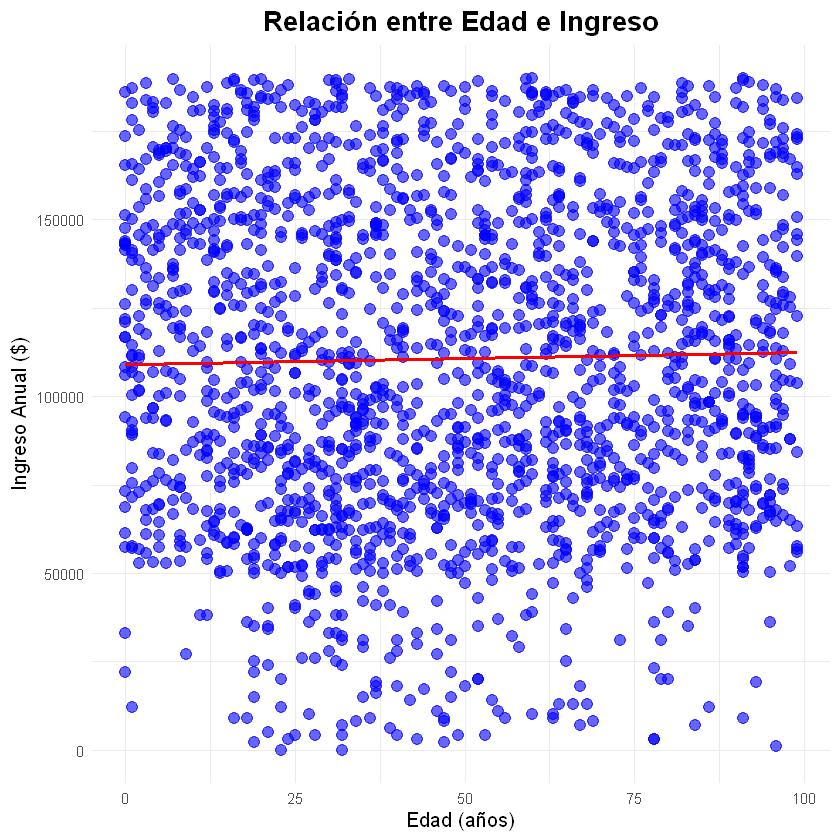

In [20]:
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)

# Gráfico de dispersión mejorado
ggplot(Customers_csv, aes(x = Age, y = Annual.Income....)) +
  geom_point(color = "blue", size = 3, alpha = 0.6) +  # Puntos de color azul, tamaño aumentado y transparencia
  geom_smooth(method = "lm", color = "red", se = FALSE) +  # Línea de regresión lineal en rojo, sin área sombreada
  labs(
    title = "Relación entre Edad e Ingreso",
    x = "Edad (años)",
    y = "Ingreso Anual ($)"
  ) +  # Título y etiquetas de ejes descriptivas
  theme_minimal() +  # Tema minimalista para un fondo limpio
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),  # Título centrado y en negrita
    axis.title = element_text(size = 12)  # Tamaño de texto de ejes aumentado
  )

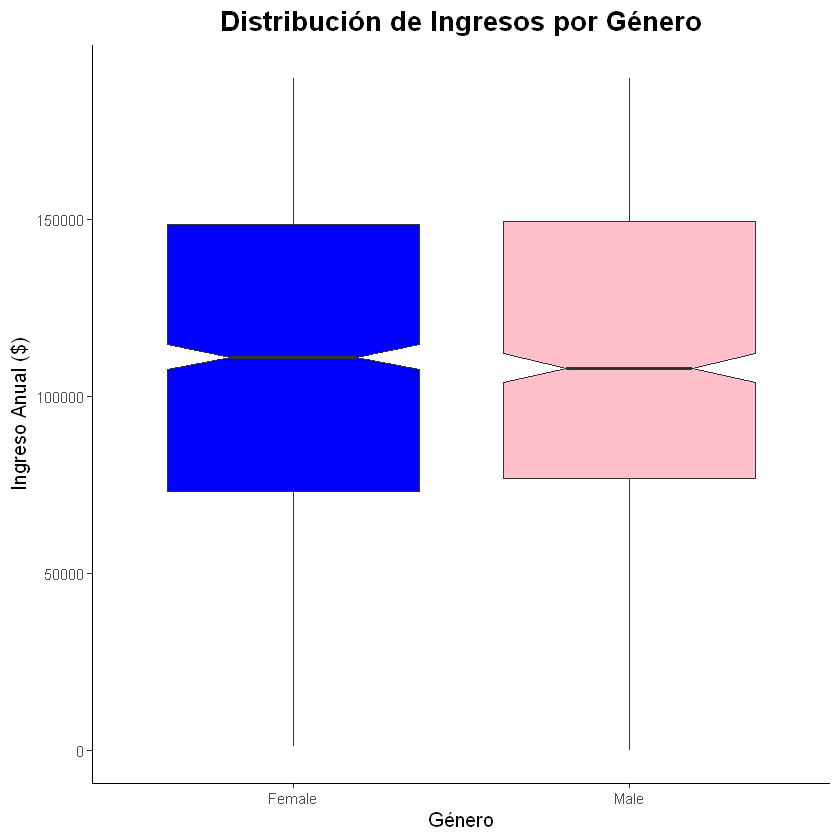

In [21]:
# Gráfico de caja por categoría mejorado
ggplot(Customers_csv, aes(x = Gender, y = Annual.Income...., fill = Gender)) +
  geom_boxplot(outlier.color = "red", outlier.shape = 8, notch = TRUE) +  # Caja de cada género con outliers en rojo y muesca
  scale_fill_manual(values = c("blue", "pink")) +  # Colores distintos para cada género
  labs(
    title = "Distribución de Ingresos por Género",
    x = "Género",
    y = "Ingreso Anual ($)"
  ) +  # Título y etiquetas de ejes
  theme_classic() +  # Tema clásico sin fondo de cuadrícula
  theme(
    legend.position = "none",  # Eliminar leyenda redundante
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    axis.title = element_text(size = 12)
  )


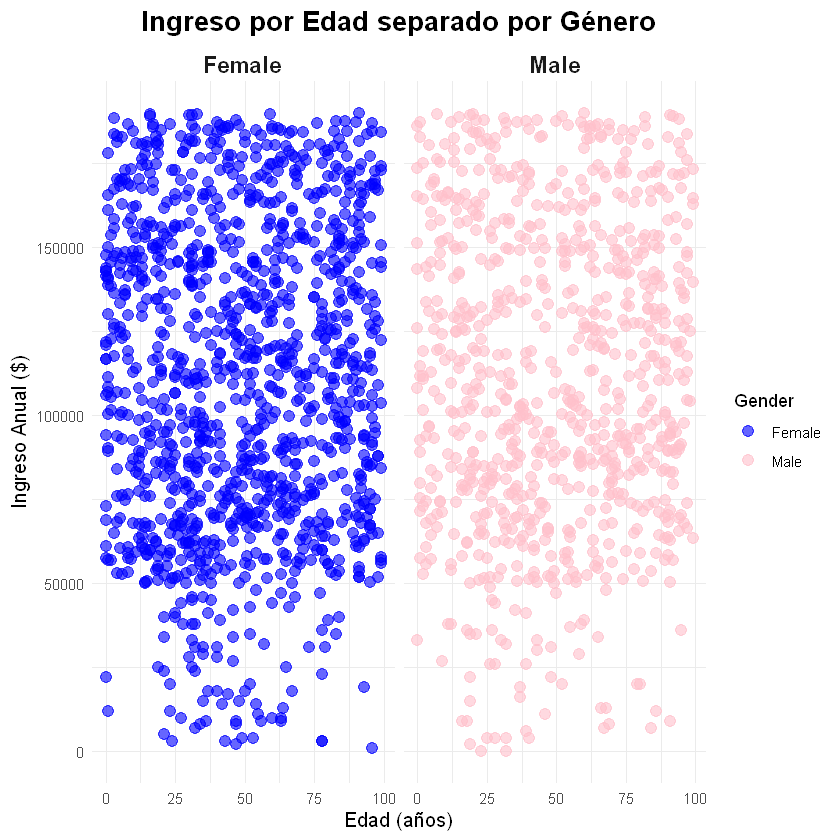

In [22]:
# Gráfico de dispersión con facetado mejorado
ggplot(Customers_csv, aes(x = Age, y = Annual.Income....)) +
  geom_point(aes(color = Gender), size = 3, alpha = 0.6) +  # Puntos con colores distintos según el género
  scale_color_manual(values = c("blue", "pink")) +  # Colores personalizados para cada género
  facet_wrap(~ Gender, ncol = 2) +  # Facetado por género con dos columnas
  labs(
    title = "Ingreso por Edad separado por Género",
    x = "Edad (años)",
    y = "Ingreso Anual ($)"
  ) +  # Título y etiquetas de ejes
  theme_minimal() +  # Tema minimalista para un fondo limpio
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    axis.title = element_text(size = 12),
    strip.text = element_text(size = 14, face = "bold")  # Texto de facetas en negrita y mayor tamaño
  )

<br>

## Apartado 5: Ejercicios Extra

## Ejercicio 1: Fundamentos de R

**Objetivo**: Familiarizarse con la importación, exploración y preparación de datos en R.

- Importa un conjunto de datos en el formato que prefieras (CSV, Excel, etc.). Usa funciones adecuadas para importar y cargar los datos en R.
- Realiza un control de calidad rápido: explora las primeras filas, muestra la estructura y un resumen estadístico de las columnas.
- Modifica el tipo de dato de alguna columna si es necesario. Por ejemplo, si tienes una columna que representa categorías o grupos, cámbiala de numérica a factor.


## Ejercicio 2: Control de Flujo

**Objetivo**: Practicar el uso de condicionales y bucles para realizar operaciones sobre datos.

- Crea un sistema de clasificación usando condicionales (if, else if, else). Define al menos tres categorías para una columna numérica de tu conjunto de datos (por ejemplo, edades o ingresos).
- Implementa un bucle para iterar sobre una columna numérica o categórica y calcula algún valor, como una suma o promedio, usando tanto un bucle for como un while.
- Usa las funciones avanzadas como *apply* o *lapply* aplicándolas sobre columnas numéricas en tu conjunto de datos (por ejemplo, para calcular el promedio o la desviación estándar en cada columna numérica).

## Ejercicio 3: Buenas Prácticas

**Objetivo**: Mejorar la legibilidad y organización del código mediante buenas prácticas de programación.

- Crea una función que realice un análisis estadístico simple (como calcular media y desviación estándar) sobre una columna de tu elección en el conjunto de datos. Asegúrate de que la función esté bien documentada, con nombres de variables y comentarios claros.

## Ejercicio 4: Uso de ggplot2

**Objetivo**: Crear visualizaciones informativas y estéticas usando ggplot2.

- Investiga la documentación de ggplot2 en línea y revisa ejemplos que te inspiren a crear visualizaciones relevantes para tu conjunto de datos.
Crea tres gráficos con ggplot2:
- Un gráfico de dispersión que muestre la relación entre dos variables numéricas.
- Un gráfico de caja (boxplot) para observar la distribución de una variable numérica según una variable categórica.
- Un gráfico con facetado que divida la visualización según una variable categórica (como género, grupo de edad, etc.).
- Personaliza al menos uno de los gráficos para que incluya una línea de tendencia, colores diferenciados, o alguna modificación estética que lo haga más claro y atractivo.

**Comentario**: Para los ejercicios que requieran el uso de una base de datos, podéis sacarlas de Kaggle o cualquier repositorio que conozcáis.